In [2]:
import appmode
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.preprocessing import normalize
from sklearn.pipeline import make_pipeline
# Loading relevant libraries

import re
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s')
# logging.root.setLevel(level=logging.INFO)
# stop_words = stopwords.words('english')
# stop_words = stop_words + ['com', 'edu', 'would', 'could', 'also', 'le', 'thank_you', 'u', 'etc']

%matplotlib inline 
# Increasing default figure size of the notebook
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 18

In [3]:
from ipywidgets import Button, Layout, Box, interactive, fixed, HBox, Label
import ipywidgets as widgets

In [4]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# from collections import Counter
import nltk

In [5]:
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
stop_words = stopwords.words('english')
stop_words = stop_words + ['would', 'like']
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles) if t.isalpha() and t not in stop_words]

In [6]:
import warnings
warnings.filterwarnings("ignore",category=PendingDeprecationWarning)
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings(action='once')

In [7]:
answer_df = pd.read_csv('N:\\ORP_accountability\\projects\\Andrew\\NLP with TES\\answered_q10_2019.csv')
answer_df = answer_df.loc[answer_df['answered_q10_over_20_words'] == 1]
# answer_df.head()

In [8]:
# answer_df.head()

In [9]:
def label_yrs_exp (row):
    yrs_exp = row['YrsExpr19']
    if yrs_exp > 25:
          return '25+'
    elif yrs_exp > 15:
        return '15-25'
    elif yrs_exp > 5:
        return '5-15'
    return '<5'

answer_df['yrs_exp_cat'] = answer_df.apply(label_yrs_exp, axis=1)

In [10]:
# answer_df.head()

In [11]:
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis


C:\Users\ca20593\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [12]:
def make_topic_visual(model, tf, tf_vectorizer):
    panel = pyLDAvis.sklearn.prepare(model, tf, tf_vectorizer, sort_topics = False)
    return pyLDAvis.display(panel)

In [13]:
def subset_df_list(df, district, gender, yrs_exp_cat, role_compass, topics):
    n_df = df
    if district != 'Any':
        n_df = n_df.loc[n_df['district_name'] == district]
    if gender != 'Any':
        n_df = n_df.loc[n_df['Gender'] == gender]
    if yrs_exp_cat!= 'Any':
        n_df = n_df.loc[n_df['yrs_exp_cat'] == yrs_exp_cat]
    if role_compass != 'Any':
        n_df = n_df.loc[n_df['Role_Compass'] == role_compass]
    answer_list = n_df.Q10.tolist()
    print('First 5 Comments: ')
    display(answer_list[:5])
    display(total_lda_vis(answer_list, num_topics = topics))
    return answer_list

In [14]:
# Converting the column of the DF with answers into a list of answers
open_ended_answers = answer_df.loc[answer_df['answered_q10'] == 1,:].Q10.tolist()

In [15]:
role_list = ['Any'] + answer_df.Role_Compass.sort_values().unique().tolist()

In [16]:
dist_list = ['Any'] + answer_df.district_name.sort_values().unique().tolist()

In [17]:
# # LDA setup
# no_features = 500
# tf_vectorizer = CountVectorizer(tokenizer=LemmaTokenizer(), max_df=0.85, min_df=2, max_features=no_features, 
#                             ngram_range=(1, 3))
# tf = tf_vectorizer.fit_transform(open_ended_answers)
# tf_feature_names = tf_vectorizer.get_feature_names()
# # Run LDA
# lda_model = LatentDirichletAllocation(n_components=12, max_iter=5, learning_method='online', 
#                     learning_offset=50.,random_state=42).fit(tf)

## Topics Based on Desired Characteristics

In [18]:
def update_range(*args):
    n_range = years_exp_range.value
    #print(n_range[0])

In [19]:
# sub_answers = interactive(subset_df_list, df = fixed(answer_df), district = dist_list, gender = ['Any', 'M', 'F'],
#                 yrs_exp_cat = ['Any', '25+', '15-25', '5-15', '<5'], role_compass = role_list, topics = range(3,24))

# Widgets
years_exp_range = widgets.IntRangeSlider(
    value=[1, 59],
    min=1,
    max=59,
    step=1,
)
years_range_display = HBox([Label('Years Experience: '), years_exp_range])

dist_dropdown = widgets.Dropdown(
    options= dist_list,
    value='Any',
    description='District:'
)

gender_radio = widgets.RadioButtons(
    options= ['Any', 'Female', 'Male'],
    value='Any',
    description='Gender:'
)

topics_slider = widgets.IntSlider(
    value=12,
    min=2,
    max=40,
    step=1
)
topics_display = HBox([Label('Number of Topics: '), topics_slider])

# role_radio = widgets.RadioButtons(
#     options= role_list[:len(role_list)-1],
#     value='Any',
#     description='Role:'
# )




In [20]:
def topic_model_vis(df, district, gender, yrs_exp, topics):
    min_yr = yrs_exp[0]
    max_yr = yrs_exp[1]
    if gender == 'Male':
        gender = 'M'
    elif gender == 'Female':
        gender = 'F'
    n_df = df
    if district != 'Any':
        n_df = n_df.loc[n_df['district_name'] == district]
    if gender != 'Any':
        n_df = n_df.loc[n_df['Gender'] == gender]
    n_df = n_df.loc[(n_df['YrsExpr19'] >= min_yr) & (n_df['YrsExpr19'] <= max_yr)]
    answer_list = n_df.Q10.tolist()
    print('First 5 Comments: ')
    display(answer_list[:5])
    # LDA setup
    no_features = 500
    tf_vectorizer = CountVectorizer(tokenizer=LemmaTokenizer(), max_df=0.85, min_df=2, max_features=no_features, 
                                ngram_range=(1, 3))
    tf = tf_vectorizer.fit_transform(answer_list)
    tf_feature_names = tf_vectorizer.get_feature_names()
    # Run LDA
    lda_model = LatentDirichletAllocation(n_components=topics, max_iter=5, learning_method='online', 
                        learning_offset=50.,random_state=42).fit(tf)
    
    display(make_topic_visual(lda_model, tf, tf_vectorizer))
    return lda_model, tf, answer_list

In [21]:
topic_model = interactive(topic_model_vis, df = fixed(answer_df), district = dist_dropdown, gender = gender_radio,
                 yrs_exp = years_exp_range, topics = topics_slider)

In [22]:
display(topic_model)

interactive(children=(Dropdown(description='District:', options=('Any', 'Achievement School District', 'Alamo'…

In [23]:
# topic_model.result[1]

In [24]:
# similar_display = interactive(find_similar_responses, base_text = 'Enter Comment Here', answer_list = fixed(sub_answers.result), 
#             num_similar = range(1,31), num_topics = fixed(sub_answers.children[4].value))

# Widgets for finding similar comments

# text_area = widgets.Textarea(
#     placeholder='Enter Text',
#     description='Base Comment:',
#     disabled=False
# )

dist_dropdown_similar = widgets.RadioButtons(
    options= [dist_dropdown.value],
    description='District:'
)

gender_dropdown_similar = widgets.RadioButtons(
    options= [gender_radio.value],
    description='Gender:'
)

yrs_min_dropdown_similar = widgets.RadioButtons(
    options= [years_exp_range.value[0]],
    description='Minimum Years Experience:'
)

yrs_max_dropdown_similar = widgets.RadioButtons(
    options= [years_exp_range.value[1]],
    description='Maximum Years Experience:'
)

# role_dropdown_similar = widgets.RadioButtons(
#     options= [role_radio.value],
#     description='Role:'
# )

# num_topics_dropdown_similar = widgets.RadioButtons(
#     options= [topics_slider.value],
#     description='Number of Topics:'
# )

top_n_within_topic_slider = widgets.IntSlider(
    min=1,
    max=25,
    step=1,
    value =1,
    description = 'Fit Within Topic:'
)

topic_question = widgets.IntSlider(
    min=1,
    max=topics_slider.value,
    step=1,
    value =1,
    description = 'Select Topic Number from Above:'
)


In [25]:
# topic_question.max

In [26]:
# dist_dropdown.value

In [27]:
def update_similar_args(*args):
    dist_dropdown_similar.options = [dist_dropdown.value]
    gender_dropdown_similar.options = [gender_radio.value]
    yrs_min_dropdown_similar.options = [years_exp_range.value[0]]
    yrs_max_dropdown_similar.options = [years_exp_range.value[1]]
    topic_question.max = topics_slider.value
#     role_dropdown_similar.options = [role_radio.value]
#     num_topics_dropdown_similar.options = [topics_slider.value]

In [28]:
# Observe variables to update from first widget
dist_dropdown.observe(update_similar_args, 'value')
gender_radio.observe(update_similar_args, 'value')
years_exp_range.observe(update_similar_args, 'value')
topic_question.observe(update_similar_args, 'value')
# role_radio.observe(update_similar_args, 'value')
# topics_slider.observe(update_similar_args, 'value')


In [29]:
def show_previous_widget(district, gender, yrs_exp_min, yrs_exp_max, topic_in_question,
                         top_n_within_topic):
    lda_model = topic_model.result[0]
    tf = topic_model.result[1]
    answer_list = topic_model.result[2]
    
    doc_topic = lda_model.transform(tf)
    topic_df = pd.DataFrame(data=doc_topic,    # values
             index=range(len(doc_topic))  )  # 1st column as index

    
    print('\nBest Fit Within Topic: \n')
    print(answer_list[int(topic_df.sort_values(by=topic_in_question-1,ascending = False).iloc[top_n_within_topic-1,:].name)])
    
    print('\n\n Worst Fit Within Topic: \n')
    print(answer_list[int(topic_df.sort_values(by=topic_in_question-1).iloc[top_n_within_topic-1,:].name)])
    # print(answer_list[:3])
    
    return topic_df
    

## Find comments that fit best or worst within the topics shown above
- Use the tool below to aid in topic interpretation
- Select the topic you would like to inspect
- Select the position for the best and worst fit within the topic
    - For example, 2 displays the 2nd highest scoring comment in the topic and the 2nd lowest scoring comment in the topic

In [30]:
# similar_comments = interactive(show_similar_responses, base_text = text_area, answer_list = fixed(update_list()), 
#             num_similar = num_similar_slider, num_topics = fixed(7))

topic_interpretation = interactive(show_previous_widget, district = dist_dropdown_similar, 
                               gender = gender_dropdown_similar, yrs_exp_min = yrs_min_dropdown_similar, 
                               yrs_exp_max = yrs_max_dropdown_similar, topic_in_question = topic_question,
                               top_n_within_topic = top_n_within_topic_slider)

In [31]:
display(topic_interpretation)

interactive(children=(RadioButtons(description='District:', options=('Any',), value='Any'), RadioButtons(descr…

# Similar Comments 

In [39]:
class tfidfTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles) if t.isalpha()]

In [40]:
from sklearn.metrics.pairwise import cosine_similarity

In [41]:
def get_tf_idf_query_similarity(district, gender, yrs_exp_min, yrs_exp_max, 
                                query, num_similar):
    """
    vectorizer: TfIdfVectorizer model
    docs_tfidf: tfidf vectors for all docs
    query: query doc

    return: cosine similarity between query and all docs
    """
    # display(query)
    answer_list = topic_model.result[2]
    vectorizer = TfidfVectorizer(tokenizer=tfidfTokenizer(), ngram_range=(1,2))
    docs_tfidf = vectorizer.fit_transform(answer_list)
    
    query_tfidf = vectorizer.transform([query])
    cosineSimilarities = cosine_similarity(query_tfidf, docs_tfidf).flatten()
    
    sim_df = pd.DataFrame(data=cosineSimilarities,    # values
                        columns = ['similarity_score'],
                         index=range(len(cosineSimilarities))  )
    
    sim_list = [answer_list[ind] for ind in sim_df.sort_values(by = 'similarity_score', ascending = False).head(num_similar).index.values.tolist()]
    for comment in sim_list:
        print(comment)
        print('\n')
    return cosineSimilarities, sim_list

In [42]:
# sim_array = get_tf_idf_query_similarity(vectorizer, docs_tfidf, 'Smaller class sizes  Eliminate the preK and kindergarten portfolio.')

In [43]:
# topic_df = pd.DataFrame(data=sim_array,    # values
#                         columns = ['similarity_score'],
#                          index=range(len(sim_array))  )

In [44]:
# topic_df.sort_values(by = 'similarity_score', ascending = False).head(10).index.values.tolist()

In [45]:
# [answer_list[ind] for ind in topic_df.sort_values(by = 'similarity_score', ascending = False).head(10).index.values.tolist()]

In [46]:
text_area = widgets.Textarea(
    placeholder='Enter Text',
    description='Base Comment:',
    rows = 8,
    disabled=False
)

num_similar_slider = widgets.IntSlider(
    min=1,
    max=25,
    value = 5,
    step=1,
    description = 'Number Similar:'
)

In [47]:
# similar_comments = interactive(show_similar_responses, base_text = text_area, answer_list = fixed(update_list()), 
#             num_similar = num_similar_slider, num_topics = fixed(7))

similar_display = interactive(get_tf_idf_query_similarity, district = dist_dropdown_similar, 
                               gender = gender_dropdown_similar, yrs_exp_min = yrs_min_dropdown_similar, 
                               yrs_exp_max = yrs_max_dropdown_similar, query = text_area, num_similar = num_similar_slider)

In [48]:
display(similar_display)

interactive(children=(RadioButtons(description='District:', options=('Any',), value='Any'), RadioButtons(descr…

In [49]:
import heapq

In [50]:
#topic_interpretation.result.head()

In [51]:
def label_second_dominant (row):
    score_list = [row[topic_num] for topic_num in range(len(row))]
    two_largest = heapq.nlargest(2, range(len(score_list)), key=score_list.__getitem__)
    second_ind = two_largest[1]
    return second_ind
    
int_topic_df = pd.DataFrame(topic_interpretation.result)



In [52]:
#int_topic_df.head()

In [53]:
# Extract integer index of dominant topic
dominant_topic = int_topic_df.idxmax(axis = 1).rename('dominant_topic')

int_topic_df['second_dominant'] = int_topic_df.apply(label_second_dominant, axis=1)
    
topic_df_w_dominants = pd.concat([int_topic_df, dominant_topic], axis=1)
#topic_df_w_dominants.head(10)

In [54]:
dom_df = topic_df_w_dominants
dom_df['second_dominant'] = dom_df['second_dominant'] + 1
dom_df['dominant_topic'] = dom_df['dominant_topic'] + 1
#dom_df.head()

# Topic Key

In [84]:
topic_labels = ['Testing', 'Special Education', 'Teacher Evaluation', 'School Climate', 'Planning Time',
               'Technology', 'Salary', 'Standards', 'Charter Schools', 'Test Prep', 'Instructional Materials', 'Behavior and Discipline']

label_df = pd.DataFrame({'topic_label': topic_labels})

label_df_reset = label_df.reset_index().rename(columns = {'index': 'dominant_topic', 'topic_label': 'dominant_topic_label'})
label_df_reset['dominant_topic'] = label_df_reset['dominant_topic'] + 1 

label_df_reset_second = label_df.reset_index().rename(columns = {'index': 'second_dominant', 'topic_label': 'second_dominant_topic_label'})
label_df_reset_second['second_dominant'] = label_df_reset_second['second_dominant'] + 1

label_df_reset.rename(columns = {'dominant_topic': 'Topic Number', 'dominant_topic_label':'Topic Label'})

,Topic Number,Topic Label
0,1,Testing
1,2,Special Education
2,3,Teacher Evaluation
3,4,School Climate
4,5,Planning Time
5,6,Technology
6,7,Salary
7,8,Standards
8,9,Charter Schools
9,10,Test Prep


# Breakdown of Comments By First and Second Most Dominant Topics

In [85]:
#first_with_labels

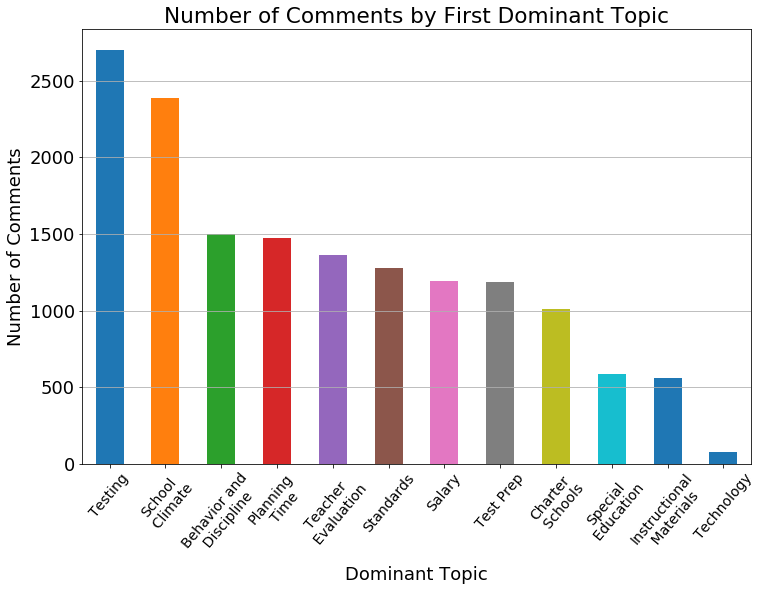

In [103]:
first_dom = dom_df[['dominant_topic']].reset_index().groupby(by = 'dominant_topic').agg('count').reset_index()\
                            .rename(columns = {'index': 'count'})

first_with_labels = pd.concat([first_dom, label_df], axis=1).sort_values(by= 'count', ascending = False)

first_with_labels.plot(x = 'topic_label', y='count', kind='bar', rot = 50, legend = None)
plt.grid(axis = 'y')
plt.xticks(ticks = range(12), labels = ['Testing',  'School\n Climate', 'Behavior and\n Discipline', 'Planning\n Time',  
                                        'Teacher\n Evaluation', 'Standards', 'Salary', 'Test Prep','Charter\n Schools', 'Special\n Education', 
                                        'Instructional\n Materials', 'Technology'],
          fontsize = 14)
plt.xlabel('Dominant Topic')
plt.ylabel('Number of Comments')
plt.title('Number of Comments by First Dominant Topic');

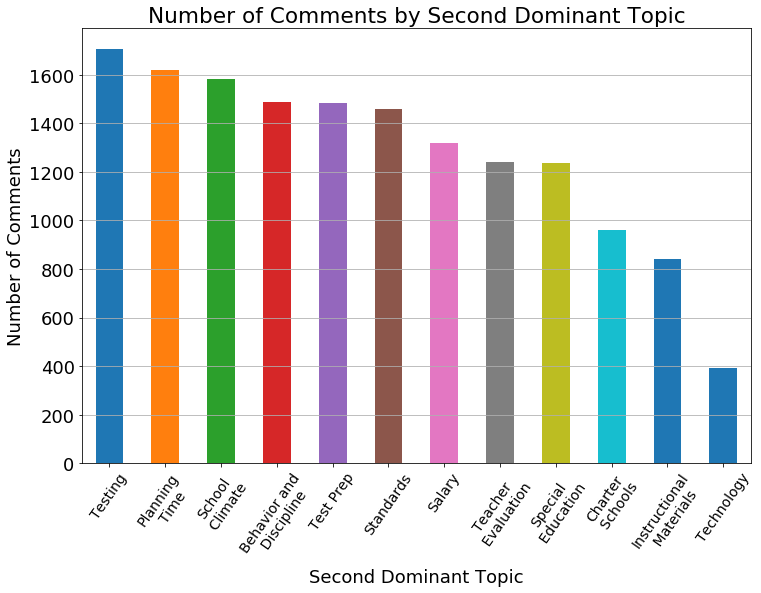

In [102]:
second_dom = dom_df[['second_dominant']].reset_index().groupby(by = 'second_dominant').agg('count').reset_index()\
                            .rename(columns = {'index': 'count'})

second_with_labels = pd.concat([second_dom, label_df], axis=1).sort_values(by= 'count', ascending = False)
second_with_labels.plot(x = 'topic_label', y='count', kind='bar', rot = 55, legend = None)
plt.grid(axis = 'y')
plt.xticks(ticks = range(12), labels = ['Testing', 'Planning\n Time',  'School\n Climate', 'Behavior and\n Discipline', 
                                        'Test Prep', 'Standards',  'Salary', 'Teacher\n Evaluation','Special\n Education', 'Charter\n Schools',
                                        'Instructional\n Materials', 'Technology'],
          fontsize = 14)
plt.xlabel('Second Dominant Topic')
plt.ylabel('Number of Comments')
plt.title('Number of Comments by Second Dominant Topic');

# Most Common Combinations of Top Two Topics

In [105]:
combo_df = dom_df[['dominant_topic', 'second_dominant']].reset_index().groupby(by = ['dominant_topic', 'second_dominant']).agg('count').reset_index()\
                            .rename(columns = {'index': 'count'})
combo_df_labeled = combo_df.merge(label_df_reset, how='left', on = 'dominant_topic')\
                            .merge(label_df_reset_second, how='left', on = 'second_dominant')\
                            .sort_values(by= 'count', ascending = False)
combo_df_labeled = combo_df_labeled[['dominant_topic_label', 'second_dominant_topic_label', 'count']]\
                                    .rename(columns={'dominant_topic_label': 'Dominant Topic', 'second_dominant_topic_label':'Second Dominant Topic',
                                                    'count': 'Number of Comments'})
combo_df_labeled['Percent of Comments'] = round(combo_df_labeled['Number of Comments']/ len(dom_df) * 100, 1)
combo_df_labeled.head(15)

,Dominant Topic,Second Dominant Topic,Number of Comments,Percent of Comments
8,Testing,Test Prep,513,3.3
43,School Climate,Behavior and Discipline,389,2.5
7,Testing,Charter Schools,342,2.2
3,Testing,Planning Time,295,1.9
10,Testing,Behavior and Discipline,292,1.9
36,School Climate,Planning Time,291,1.9
38,School Climate,Salary,276,1.8
6,Testing,Standards,275,1.8
124,Behavior and Discipline,School Climate,271,1.8
99,Test Prep,Testing,265,1.7


In [89]:
#dom_df.head()

,0,1,2,3,4,5,6,7,8,9,...,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11
0,0.703399,0.001282,0.106990,0.087981,0.001282,0.001282,0.001282,0.001282,0.001282,0.091374,...,0,0,0,0,0,0,0,0,0,0
1,0.004902,0.134701,0.004902,0.455626,0.004902,0.004902,0.146351,0.224105,0.004902,0.004902,...,0,1,0,0,0,1,0,0,0,0
2,0.654176,0.003205,0.003205,0.003205,0.281878,0.035099,0.003205,0.003205,0.003205,0.003205,...,0,0,1,0,0,0,0,0,0,0
3,0.476785,0.006945,0.453768,0.006945,0.006945,0.006944,0.006945,0.006945,0.006944,0.006945,...,1,0,0,0,0,0,0,0,0,0
4,0.910792,0.002604,0.063165,0.002604,0.002604,0.002604,0.002604,0.002604,0.002604,0.002604,...,0,0,0,0,0,0,0,0,0,0


# Classifying into topics based on minimum threshold

In [90]:
min_threshold = 0.2

base_text = 'topic_'
for i in range(12):
    col_text = base_text + str(i)
    dom_df[col_text] = np.where(dom_df[i]>=min_threshold, 1, 0)

In [120]:
print('Minimum Threshold: ' + str(min_threshold))

Minimum Threshold: 0.2


In [91]:
#dom_df.loc[:,'topic_0':'topic_11'].head()

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,1,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0


In [98]:
topic_count = pd.DataFrame(dom_df.loc[:,'topic_0':'topic_11'].sum(axis = 0, skipna = True)).reset_index().rename(columns={0:'count'})
topic_count_labeled = pd.concat([topic_count, label_df], axis=1).sort_values(by='count', ascending=False)
topic_count_labeled['pct_comments'] = round(topic_count_labeled['count']/len(dom_df) * 100,1)
topic_count_labeled = topic_count_labeled.rename(columns = {'topic_label':'Topic', 'count':'Number of Comments', 'pct_comments':'Percentage of Comments'})
topic_count_labeled[['Topic', 'Number of Comments', 'Percentage of Comments']]

,Topic,Number of Comments,Percentage of Comments
0,Testing,4419,28.8
3,School Climate,4005,26.1
4,Planning Time,3055,19.9
11,Behavior and Discipline,2911,19.0
7,Standards,2634,17.2
9,Test Prep,2626,17.1
2,Teacher Evaluation,2582,16.8
6,Salary,2457,16.0
8,Charter Schools,2114,13.8
10,Instructional Materials,1433,9.3


In [106]:
print('Number of comments assigned into topic: ' + str(topic_count_labeled['Number of Comments'].sum()))

Number of comments assigned into topic: 29958


In [108]:
row_tally = pd.DataFrame(dom_df.loc[:,'topic_0':'topic_11'].sum(axis = 1, skipna = True))
print('Number of comments sort into no topics: ' + str(len(row_tally.loc[row_tally[0] == 0])))

Number of comments sort into no topics: 14


In [118]:
print('Number of comments sort into at least 2 topics: ' + str(len(row_tally.loc[row_tally[0] >= 2])))


Number of comments sort into at least 2 topics: 11781


In [119]:
dom_df.loc[:,'topic_0':'topic_11'].sum(axis = 1, skipna = True).reset_index().rename(columns={0:'count'})\
                                .groupby(by = 'count').agg('count')\
                                .reset_index().rename(columns = {'count':'Number Topics Assigned', 'index':'Count'})

,Number Topics Assigned,Count
0,0,14
1,1,3534
2,2,8994
3,3,2712
4,4,75
